In [1]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

In [3]:
df_oneday = pd.read_csv("관광_당일여행_동반자_유형__중복응답__20240520014137.csv", encoding='utf-8')
df_moreday = pd.read_csv("관광_숙박여행_동반자_유형__중복응답__20240520014059.csv", encoding='utf-8')

In [4]:
#연령대별, 성별, 직업별, 숙박/당일 동반 유형 분포 (2019-2022)

## 당일여행 동반자 유형 분석(20대)

In [5]:
df_oneday

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
0,2019,전체,소계,49.6,41.7,6.6,2.2,2.0,0.3,0.3
1,2019,성별,남자,51.0,40.8,6.0,2.7,2.0,0.4,0.3
2,2019,성별,여자,48.3,42.5,7.2,1.7,2.1,0.2,0.3
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
...,...,...,...,...,...,...,...,...,...,...
119,2022,가구소득,200~300만원 미만,44.1,48.9,5.2,2.6,2.3,0.1,-
120,2022,가구소득,300~400만원 미만,55.7,40.2,3.2,2.2,1.5,-,-
121,2022,가구소득,400~500만원 미만,59.6,37.1,2.3,2,1.2,0.4,-
122,2022,가구소득,500~600만원 미만,55.8,42.1,1.6,1.7,1.1,0.1,-


In [6]:
df_oneday["통계분류(1)"].unique()

array(['전체', '성별', '연령', '직업', '학력', '가구원수', '가구소득'], dtype=object)

In [7]:
df_oneday["통계분류(2)"].unique()

array(['소계', '남자', '여자', '15~19세', '20대', '30대', '40대', '50대', '60대',
       '70세 이상', '임금봉급근로자', '고용원있는사업주', '고용원없는자영업자', '무급가족 종사자', '전업주부',
       '학생', '기타', '초졸 이하', '중학교', '고등학교', '대학교이상', '1인', '2인', '3인이상',
       '100만원 미만', '100~200만원 미만', '200~300만원 미만', '300~400만원 미만',
       '400~500만원 미만', '500~600만원 미만', '600만원 이상'], dtype=object)

In [8]:
df_oneday['시점'] = df_oneday['시점'].astype(str)
df_oneday.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친목 단체/모임(동호회 종교단체 등)    float64
(직장)동료                   object
친척                      float64
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

In [9]:
df_age = df_oneday[df_oneday["통계분류(1)"]=="연령"]
df_age.head()

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등),기타
3,2019,연령,15~19세,34.9,58.8,1.3,0.2,1.5,4.4,0.2
4,2019,연령,20대,16.6,80.7,0.7,1.7,0.7,0.2,0
5,2019,연령,30대,58.2,39.1,0.8,2.2,0.9,-,0.1
6,2019,연령,40대,66.0,27.1,3.0,3.8,2.0,0.1,0.5
7,2019,연령,50대,54.0,34.2,10.3,3,2.6,-,0.2


In [10]:
df_twenty = df_age[(df_age["통계분류(2)"]=="20대")]
df_twenty.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친목 단체/모임(동호회 종교단체 등)    float64
(직장)동료                   object
친척                      float64
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

In [11]:
df_twenty.replace("-", 0, inplace=True)
df_twenty.iloc[:, 3:] = df_twenty.iloc[:, 3:].astype(float)
df_twenty_value = df_twenty.groupby("통계분류(2)")[['가족(부모 배우자 자녀 형제)',"친구/연인","친목 단체/모임(동호회 종교단체 등)","(직장)동료","친척","학교 단체(소풍 수학여행 등)"]].sum()/4
df_twenty_value

/tmp/ipykernel_41951/3702266803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twenty.replace("-", 0, inplace=True)


,가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등)
통계분류(2),,,,,,
20대,16.175,81.375,0.45,1.8,0.6,0.075


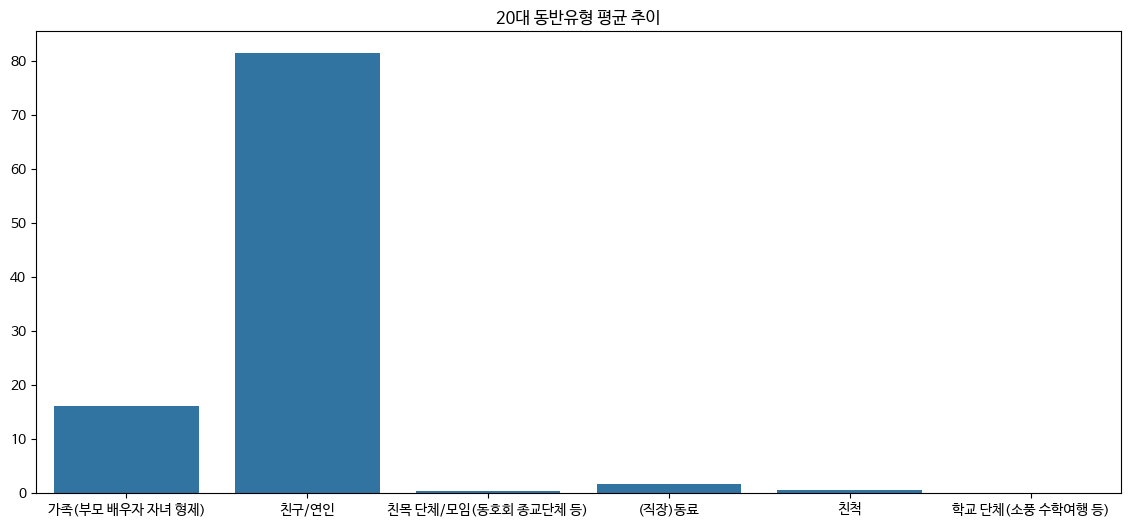

In [12]:
value_x_twenty = df_twenty_value.columns.to_list()
value_y_twenty = df_twenty_value.iloc[0].tolist()

plt.figure(figsize=(14, 6))
sns.barplot(x=value_x_twenty, y=value_y_twenty)
plt.title('20대 동반유형 평균 추이')
plt.show()

## 숙박여행 동반자 유형 분석 (40대)

### 기본 데이터

In [13]:
df_moreday
df_moreday['시점'] = df_moreday['시점'].astype(str)
df_moreday.dtypes

시점                       object
통계분류(1)                  object
통계분류(2)                  object
가족(부모 배우자 자녀 형제)        float64
친구/연인                   float64
친척                      float64
친목 단체/모임(동호회 종교단체 등)     object
(직장)동료                   object
학교 단체(소풍 수학여행 등)         object
기타                       object
dtype: object

In [14]:
df_age = df_moreday[df_oneday["통계분류(1)"]=="연령"]
df_age.head()

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친척,친목 단체/모임(동호회 종교단체 등),(직장)동료,학교 단체(소풍 수학여행 등),기타
3,2019,연령,15~19세,62.0,34.1,4.1,1.8,0.4,2.6,-
4,2019,연령,20대,20.4,75.2,1.5,1,2.9,0.7,0
5,2019,연령,30대,64.2,33.9,3.2,1,2.1,-,0.1
6,2019,연령,40대,78.8,16.1,4.5,2.8,3,0.1,0.2
7,2019,연령,50대,66.6,28.9,4.8,6,2.3,0.1,0.3


In [15]:
df_forty = df_age[(df_age["통계분류(2)"]=="40대")]
df_forty

,시점,통계분류(1),통계분류(2),가족(부모 배우자 자녀 형제),친구/연인,친척,친목 단체/모임(동호회 종교단체 등),(직장)동료,학교 단체(소풍 수학여행 등),기타
6,2019,연령,40대,78.8,16.1,4.5,2.8,3,0.1,0.2
37,2020,연령,40대,83.9,13.5,4.4,1.2,3.1,-,-
68,2021,연령,40대,87.6,10.5,3.2,0.4,2.1,-,-
99,2022,연령,40대,84.0,12.8,2.6,1.5,2.1,-,-


In [16]:
df_forty.replace("-", 0, inplace=True)
df_forty.iloc[:, 3:] = df_forty.iloc[:, 3:].astype(float)
df_forty_value = df_forty.groupby("통계분류(2)")[['가족(부모 배우자 자녀 형제)',"친구/연인","친목 단체/모임(동호회 종교단체 등)","(직장)동료","친척","학교 단체(소풍 수학여행 등)"]].sum()/4
df_forty_value

/tmp/ipykernel_41951/3484112333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forty.replace("-", 0, inplace=True)


,가족(부모 배우자 자녀 형제),친구/연인,친목 단체/모임(동호회 종교단체 등),(직장)동료,친척,학교 단체(소풍 수학여행 등)
통계분류(2),,,,,,
40대,83.575,13.225,1.475,2.575,3.675,0.025


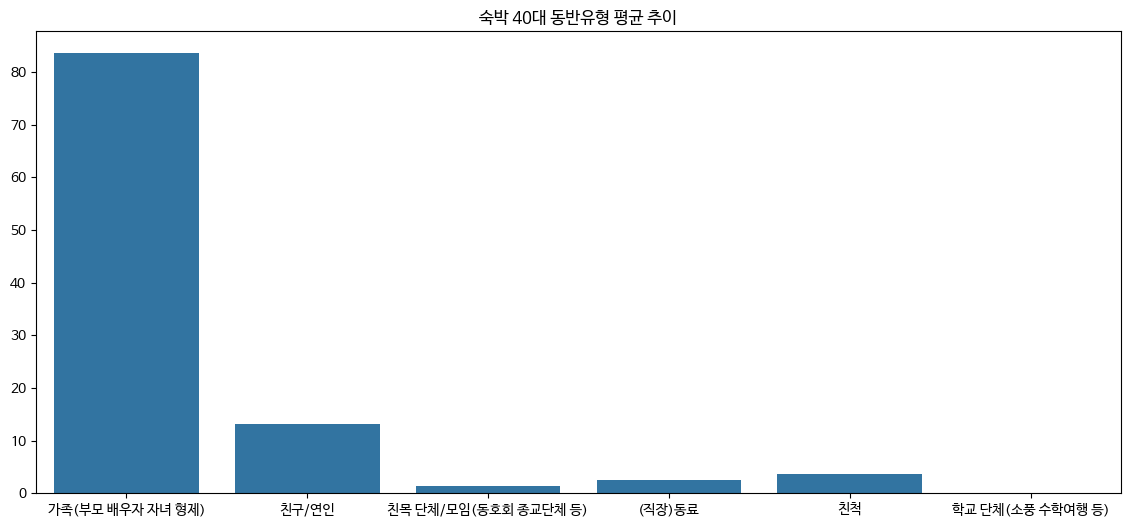

In [17]:
value_x_forty = df_forty_value.columns.to_list()
value_y_forty = df_forty_value.iloc[0].tolist()

plt.figure(figsize=(14, 6))
sns.barplot(x=value_x_forty, y=value_y_forty)
plt.title('숙박 40대 동반유형 평균 추이')
plt.show()